In [81]:
#importings all the necessary libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns

In [82]:
#readings data
df=pd.read_csv("C:\\Users\\Vaishnavi\\Downloads\\tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [83]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [84]:
df=df.drop(['Cabin','Fare'],axis=1)

In [85]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Embarked        0
dtype: int64

In [90]:
df.Age=df.Age.fillna(df.Age.mean())

In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,S


In [92]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

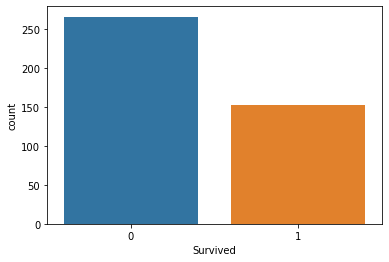

In [93]:
#visualization
sns.countplot(x='Survived',data=df)


<AxesSubplot:xlabel='Survived', ylabel='count'>

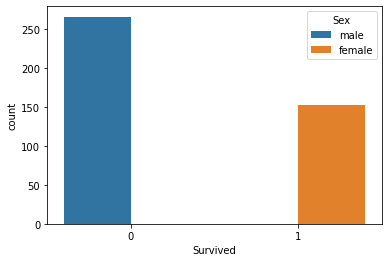

In [94]:
sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

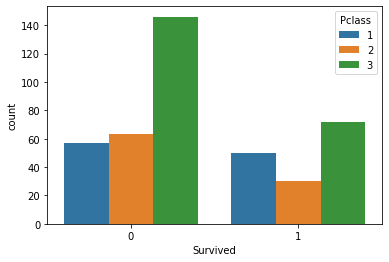

In [112]:
sns.countplot(x='Survived',hue='Pclass',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

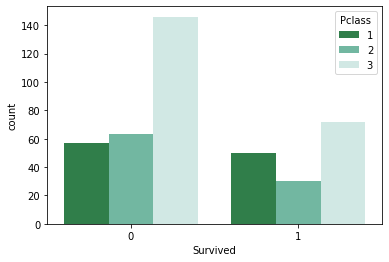

In [97]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='BuGn_r')

C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

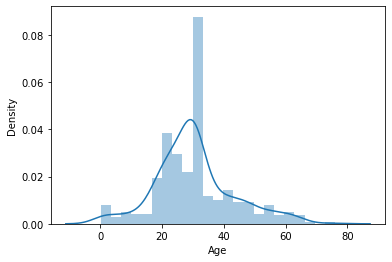

In [98]:
sns.distplot(df['Age'])

C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

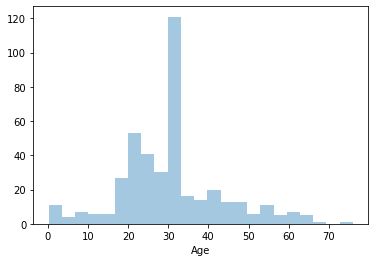

In [99]:
sns.distplot(df['Age'],kde=False)

<AxesSubplot:>

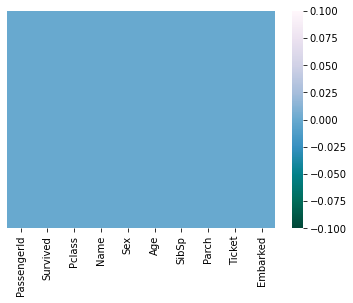

In [102]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='PuBuGn_r')

<AxesSubplot:>

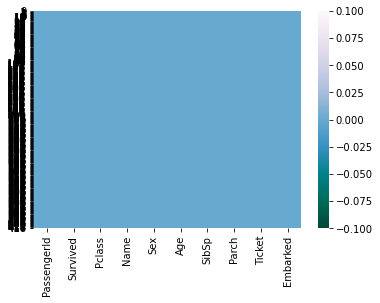

In [113]:
sns.heatmap(df.isnull(),yticklabels=True,cmap='PuBuGn_r')

<AxesSubplot:>

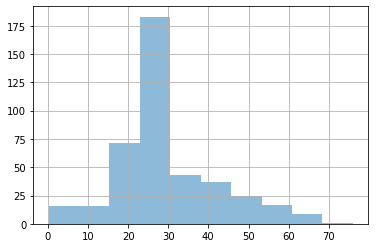

In [103]:
df['Age'].hist(alpha=0.5)

<AxesSubplot:>

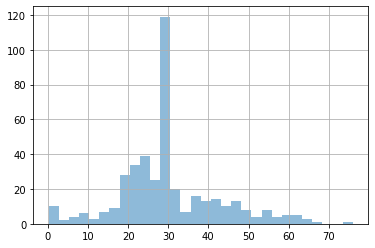

In [104]:
df['Age'].hist(alpha=0.5,bins=30)

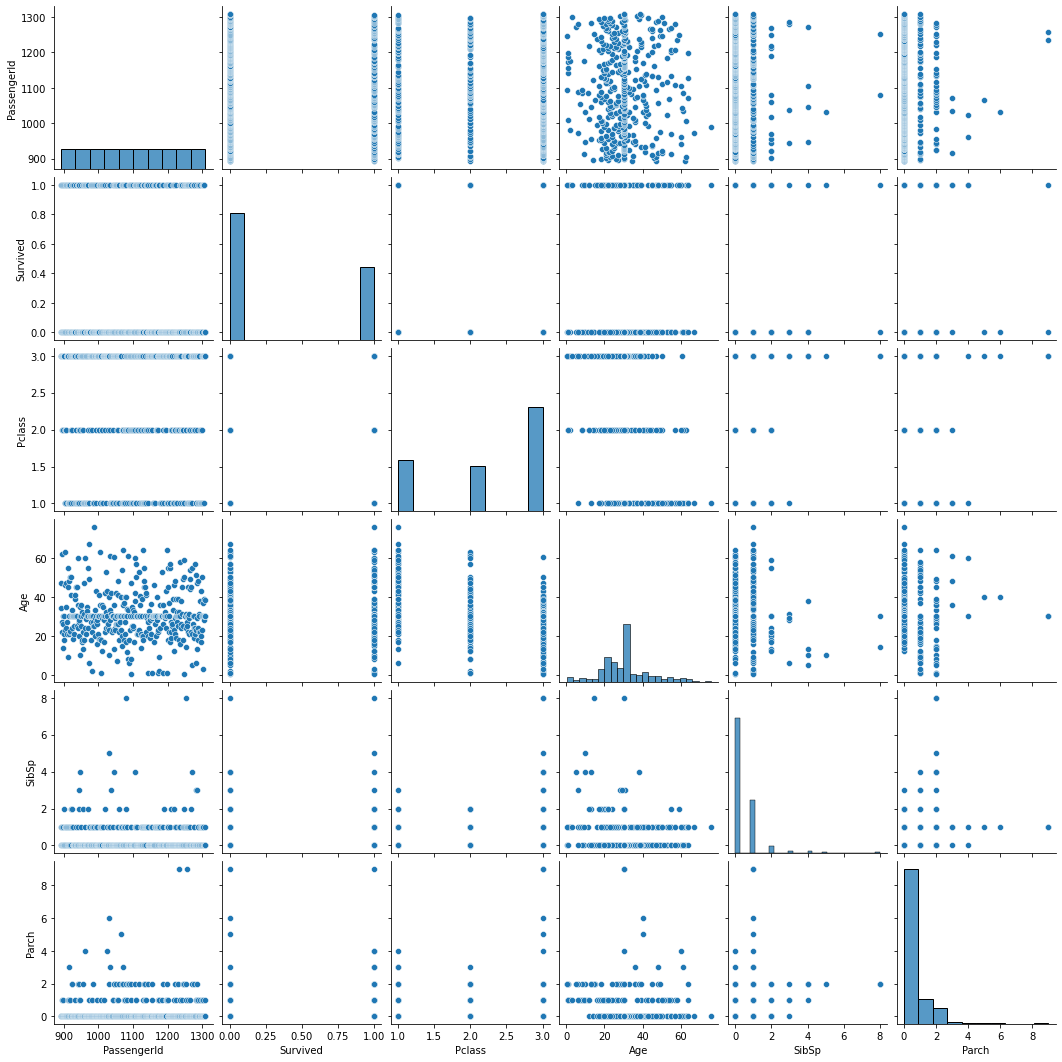

In [105]:
sns.pairplot(df)

C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


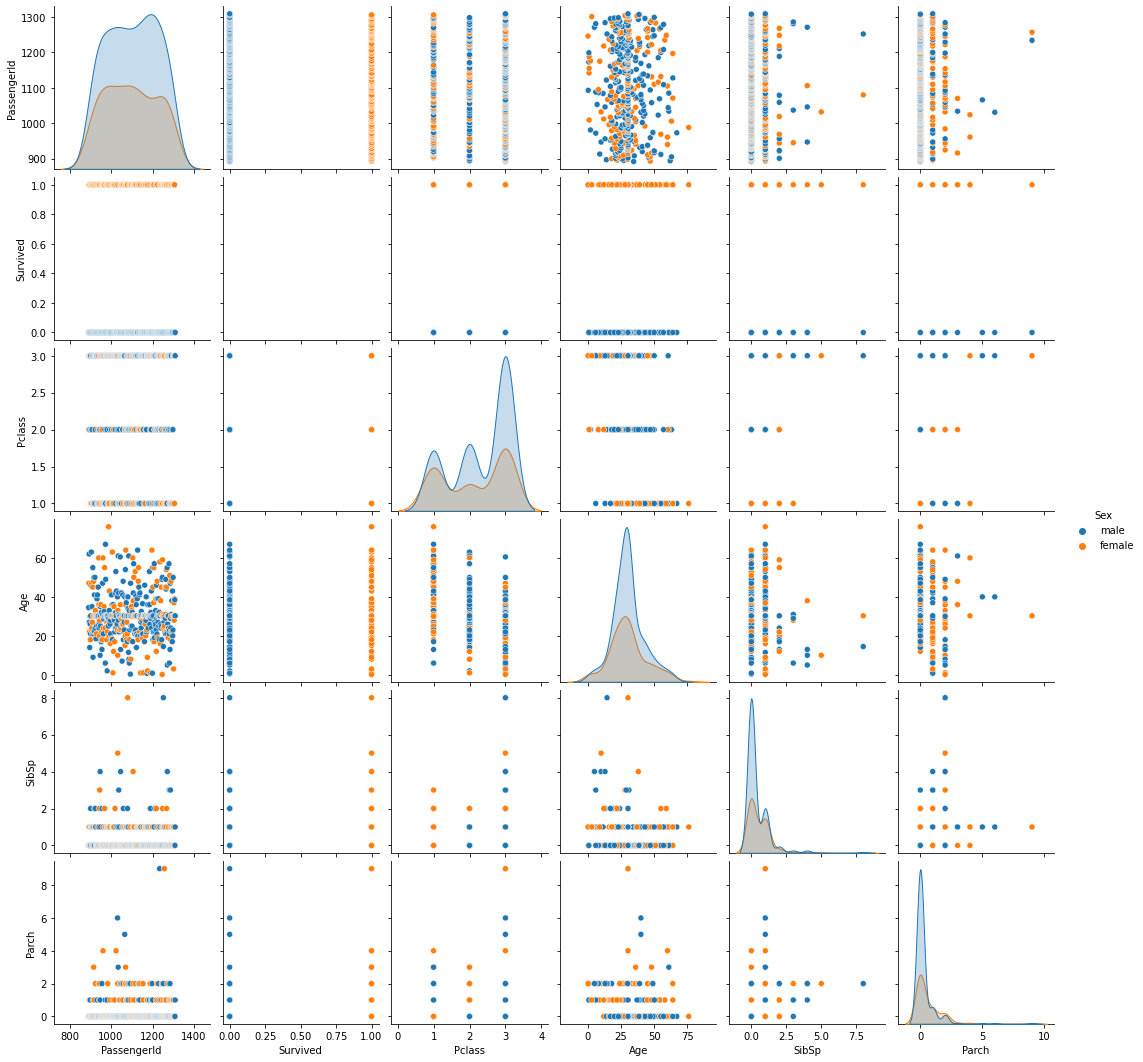

In [106]:
sns.pairplot(df,hue='Sex')

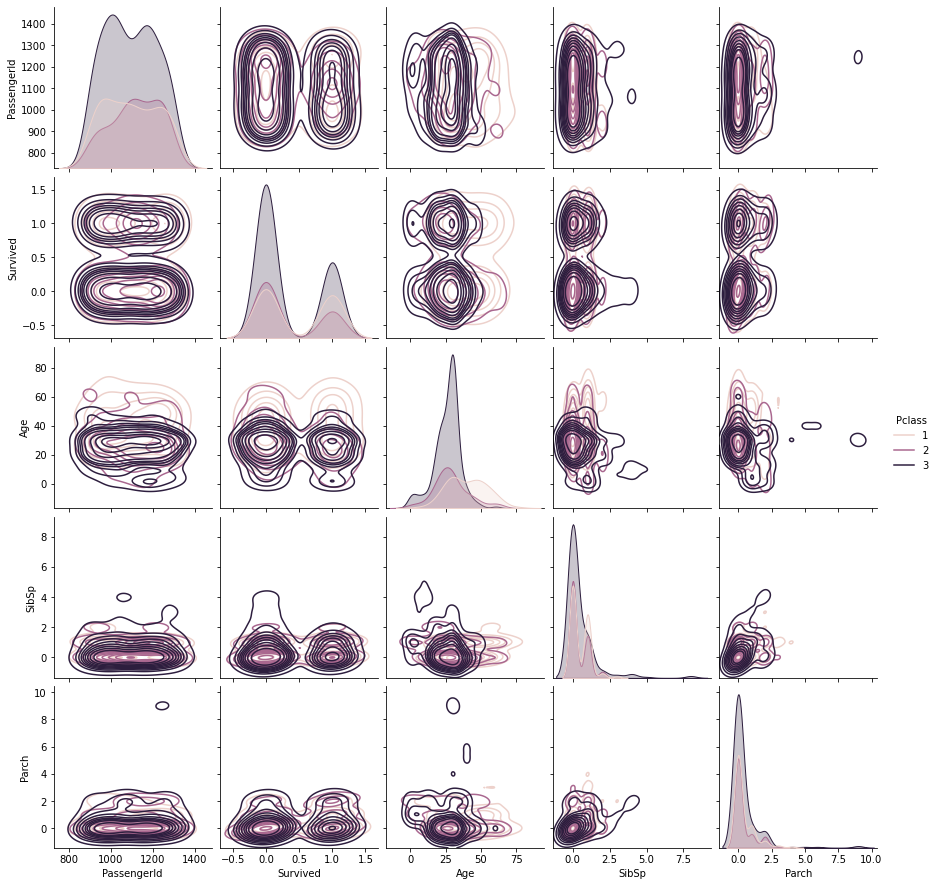

In [107]:
sns.pairplot(df,hue='Pclass',kind='kde')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

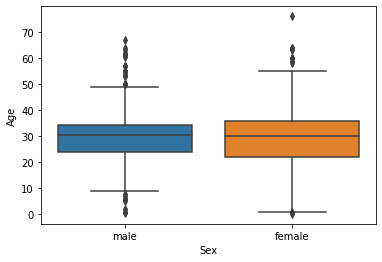

In [108]:
sns.boxplot(x='Sex',y='Age',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

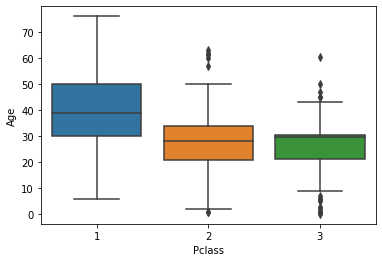

In [111]:
sns.boxplot(x='Pclass',y='Age',data=df)